<a href="https://colab.research.google.com/github/Shivanithummala/Aiml-2303a51312/blob/main/AIML_Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The way decision trees works

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

**2-Loading thre data**

In this classification task with decision trees,we will use a car dataset that is available at openML to predict the information about the car.We will load it with sklearn fetch_openml function.
The version of the data we are fetching is 2. In the version

In [3]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2, parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [6]:
car_data.details['version']

'2'

In [7]:
# Data description
car_data.keys()
#print(car_data.DESCR)

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
# Displaying feature games
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
# Getting the whole dataframe
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [10]:
type(car_data)

pandas.core.frame.DataFrame

##3 - Exploratory Analysis

Before doing exploratory analysis,let's get the training and test data

<Axes: xlabel='binaryClass', ylabel='count'>

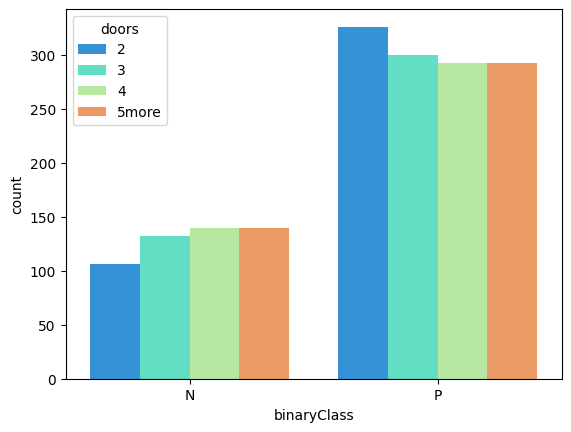

In [11]:
#plt.title("Decision of buying based on No.of persons")
sns.countplot(x=car_data.binaryClass,hue="doors",data=car_data,palette="rainbow")
#sns.Xlabel("persons")
#sns.ylabel("count")
#sns.show()

##splitting Data into Training and Test sets##

In [12]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.3, random_state=20)
#print('The size of training data is: {}\nThe size of testing data is:{}'.format(len{train_data},len(test_data)))
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1209, 7), (519, 7))

##Checking Summary Statistics

In [13]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


##Checking Missing Values

In [14]:
# Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


we don't have
##Checking Categorial Features

In [15]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

<Axes: xlabel='binaryClass', ylabel='count'>

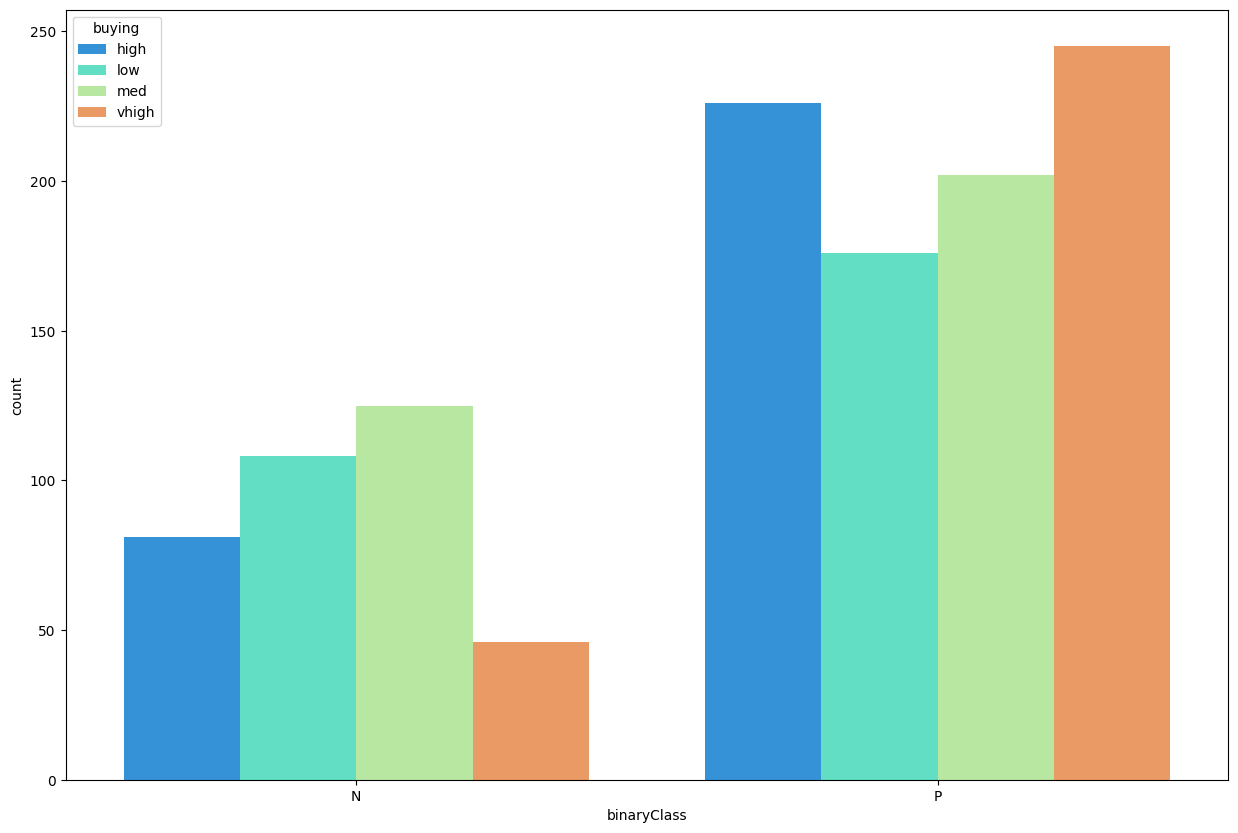

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass', hue='buying',palette="rainbow")

##Splitting Data into Training and Test sets##

In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(car_data,test_size=0.3,random_state=20)
#print('The size of training data is:{}\nThe size of the testing data is:{}'.format(len(train_data),len(test_data)))
car_data.shape,train_data.shape,test_data.shape

((1728, 7), (1209, 7), (519, 7))

Checking Summary Statistics

In [18]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


Checking Missing Values

In [19]:
#Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


we don't have any missing values

## Checking Categorical Features

Lets' inspect


In [20]:
train_data['buying'].value_counts()

,count
buying,
med,327
high,307
vhigh,291
low,284


In [21]:
train_data['maint'].value_counts()

,count
maint,
high,311
med,311
vhigh,294
low,293


In [22]:
train_data['doors'].value_counts()

,count
doors,
5more,319
2,312
4,296
3,282


In [23]:
train_data['persons'].value_counts()

,count
persons,
more,418
2,407
4,384


In [24]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

<Axes: xlabel='binaryClass', ylabel='count'>

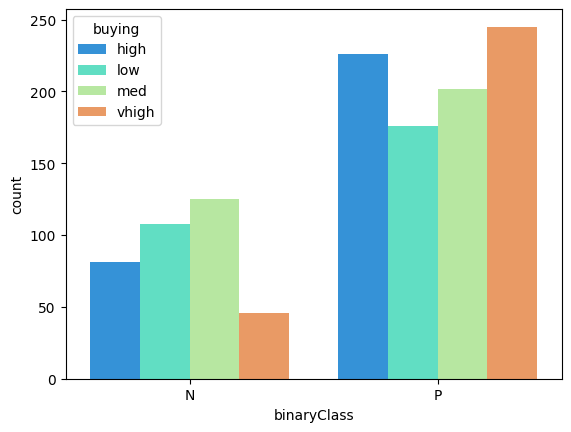

In [25]:
#plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='binaryClass',hue='buying',palette="rainbow")

Let's create a pipeline to encode all feature in the training in the input data.

In [28]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

In [31]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##5.Training Decision Tree Classifier##

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

Let's test the same model on the scaled data

In [33]:
text_representation=tree.export_text(tree_clf)
print(text_representation)

NameError: name 'tree' is not defined

In [34]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  preds=model.predict(input_data)
  acc=accuracy_score(labels,preds)
  return acc

In [35]:
from sklearn.metrics import pair_confusion_matrix
def conf_matrix(input_data,model,labels):
  preds=model.predict(input_data)
  cm=conf_matrix(labels,preds)
  return cm